# ------------------------------------- Classification---------------------------------

# 6 aug                  - Logistic regression model

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
df=pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [49]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [50]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [51]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x_transform = ss.transform(x)

In [53]:
type(x_transform)

numpy.ndarray

In [54]:
pd.DataFrame(x_transform,columns=x.columns).describe()

,Age,EstimatedSalary
count,4.000000e+02,4.000000e+02
mean,-2.331468e-16,-1.193490e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [55]:
set(y)        # gives unique elements

{0, 1}

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_transform,y,random_state=2,test_size=0.2)       


## random_state=2 ensures that the data using for train and test is same all time, if it is not mention then data of train and 
#  test will keep on changing

#test_size=0.2      means- 'test data'=  20%     and    'train data' = 80%

In [57]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred=log.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [59]:
y_test[:5]

94     0
32     0
225    0
157    0
356    1
Name: Purchased, dtype: int64

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [61]:
y_proba=log.predict_proba(x_test)
y_proba[:5]

array([[0.93116359, 0.06883641],
       [0.99868527, 0.00131473],
       [0.87273621, 0.12726379],
       [0.94689362, 0.05310638],
       [0.09062931, 0.90937069]])

In [62]:
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

#            Decision tree

In [87]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

x=cancer.data
y=cancer.target

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [89]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

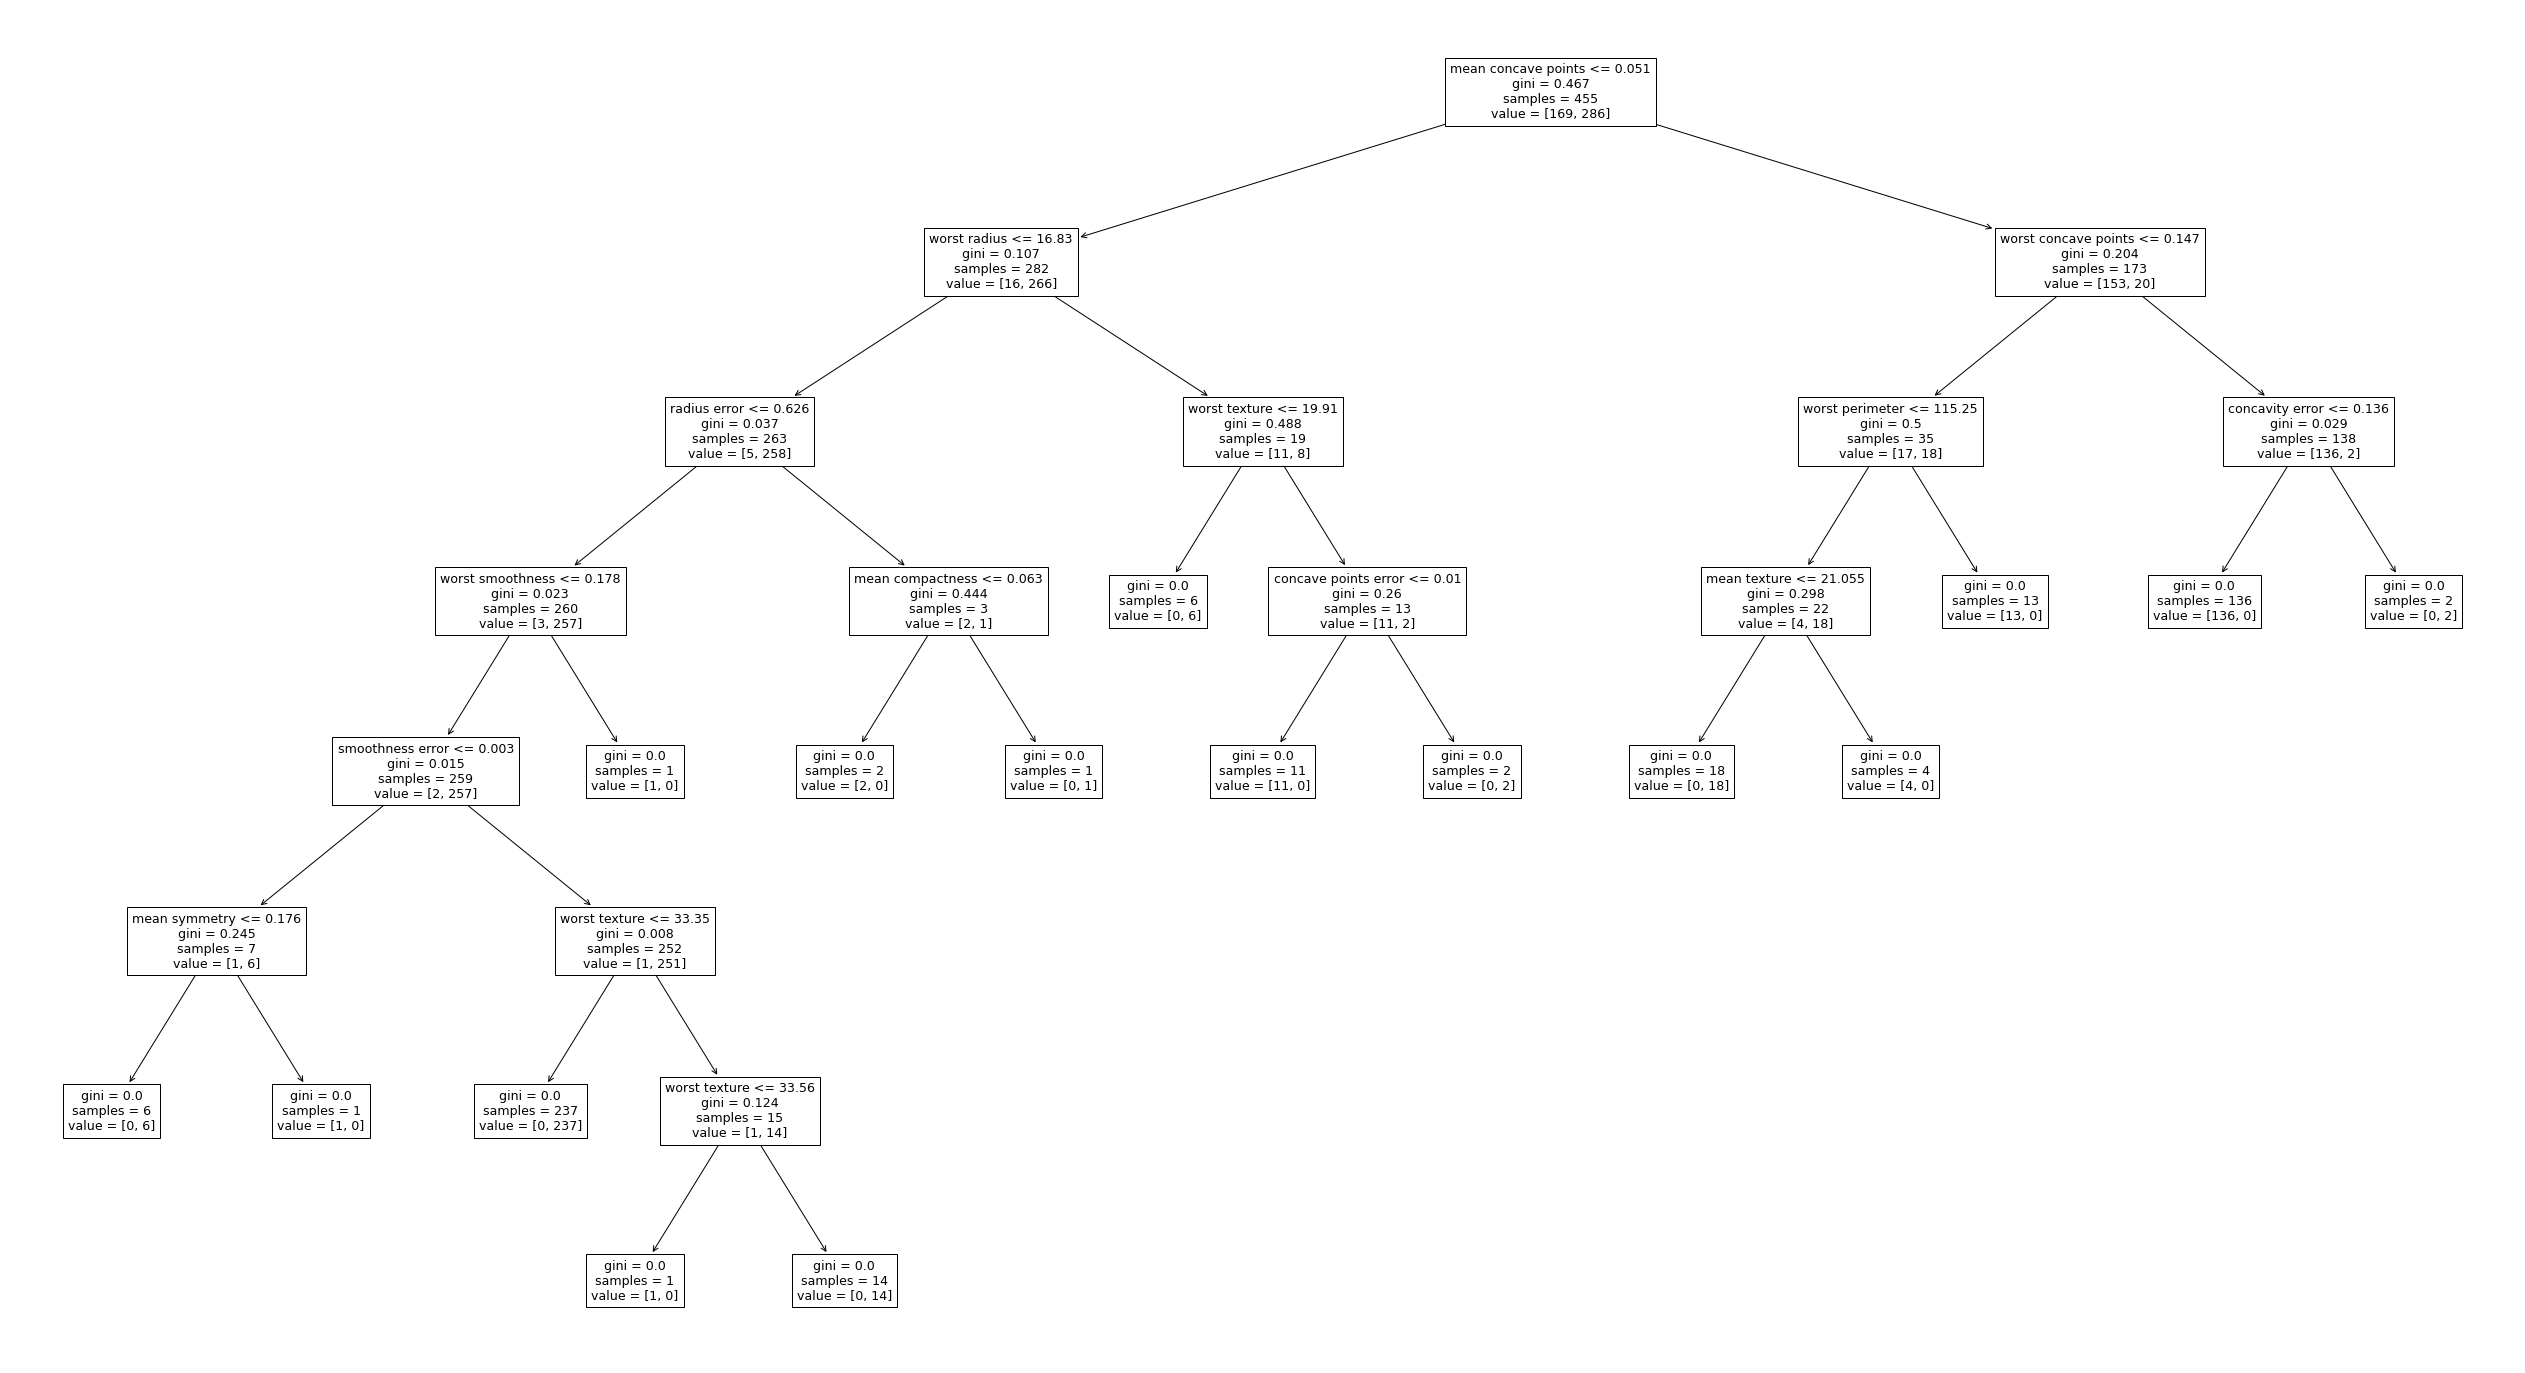

In [90]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(45,25))
plot_tree(tree,feature_names=cancer.feature_names)
plt.show()

In [91]:
tree.get_depth()

7

In [92]:
from sklearn.metrics import accuracy_score
y_pred=tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.9385964912280702

In [93]:
y_pred[:5]

array([1, 0, 0, 1, 1])

In [94]:
y_test[:5]

array([1, 0, 0, 1, 1])

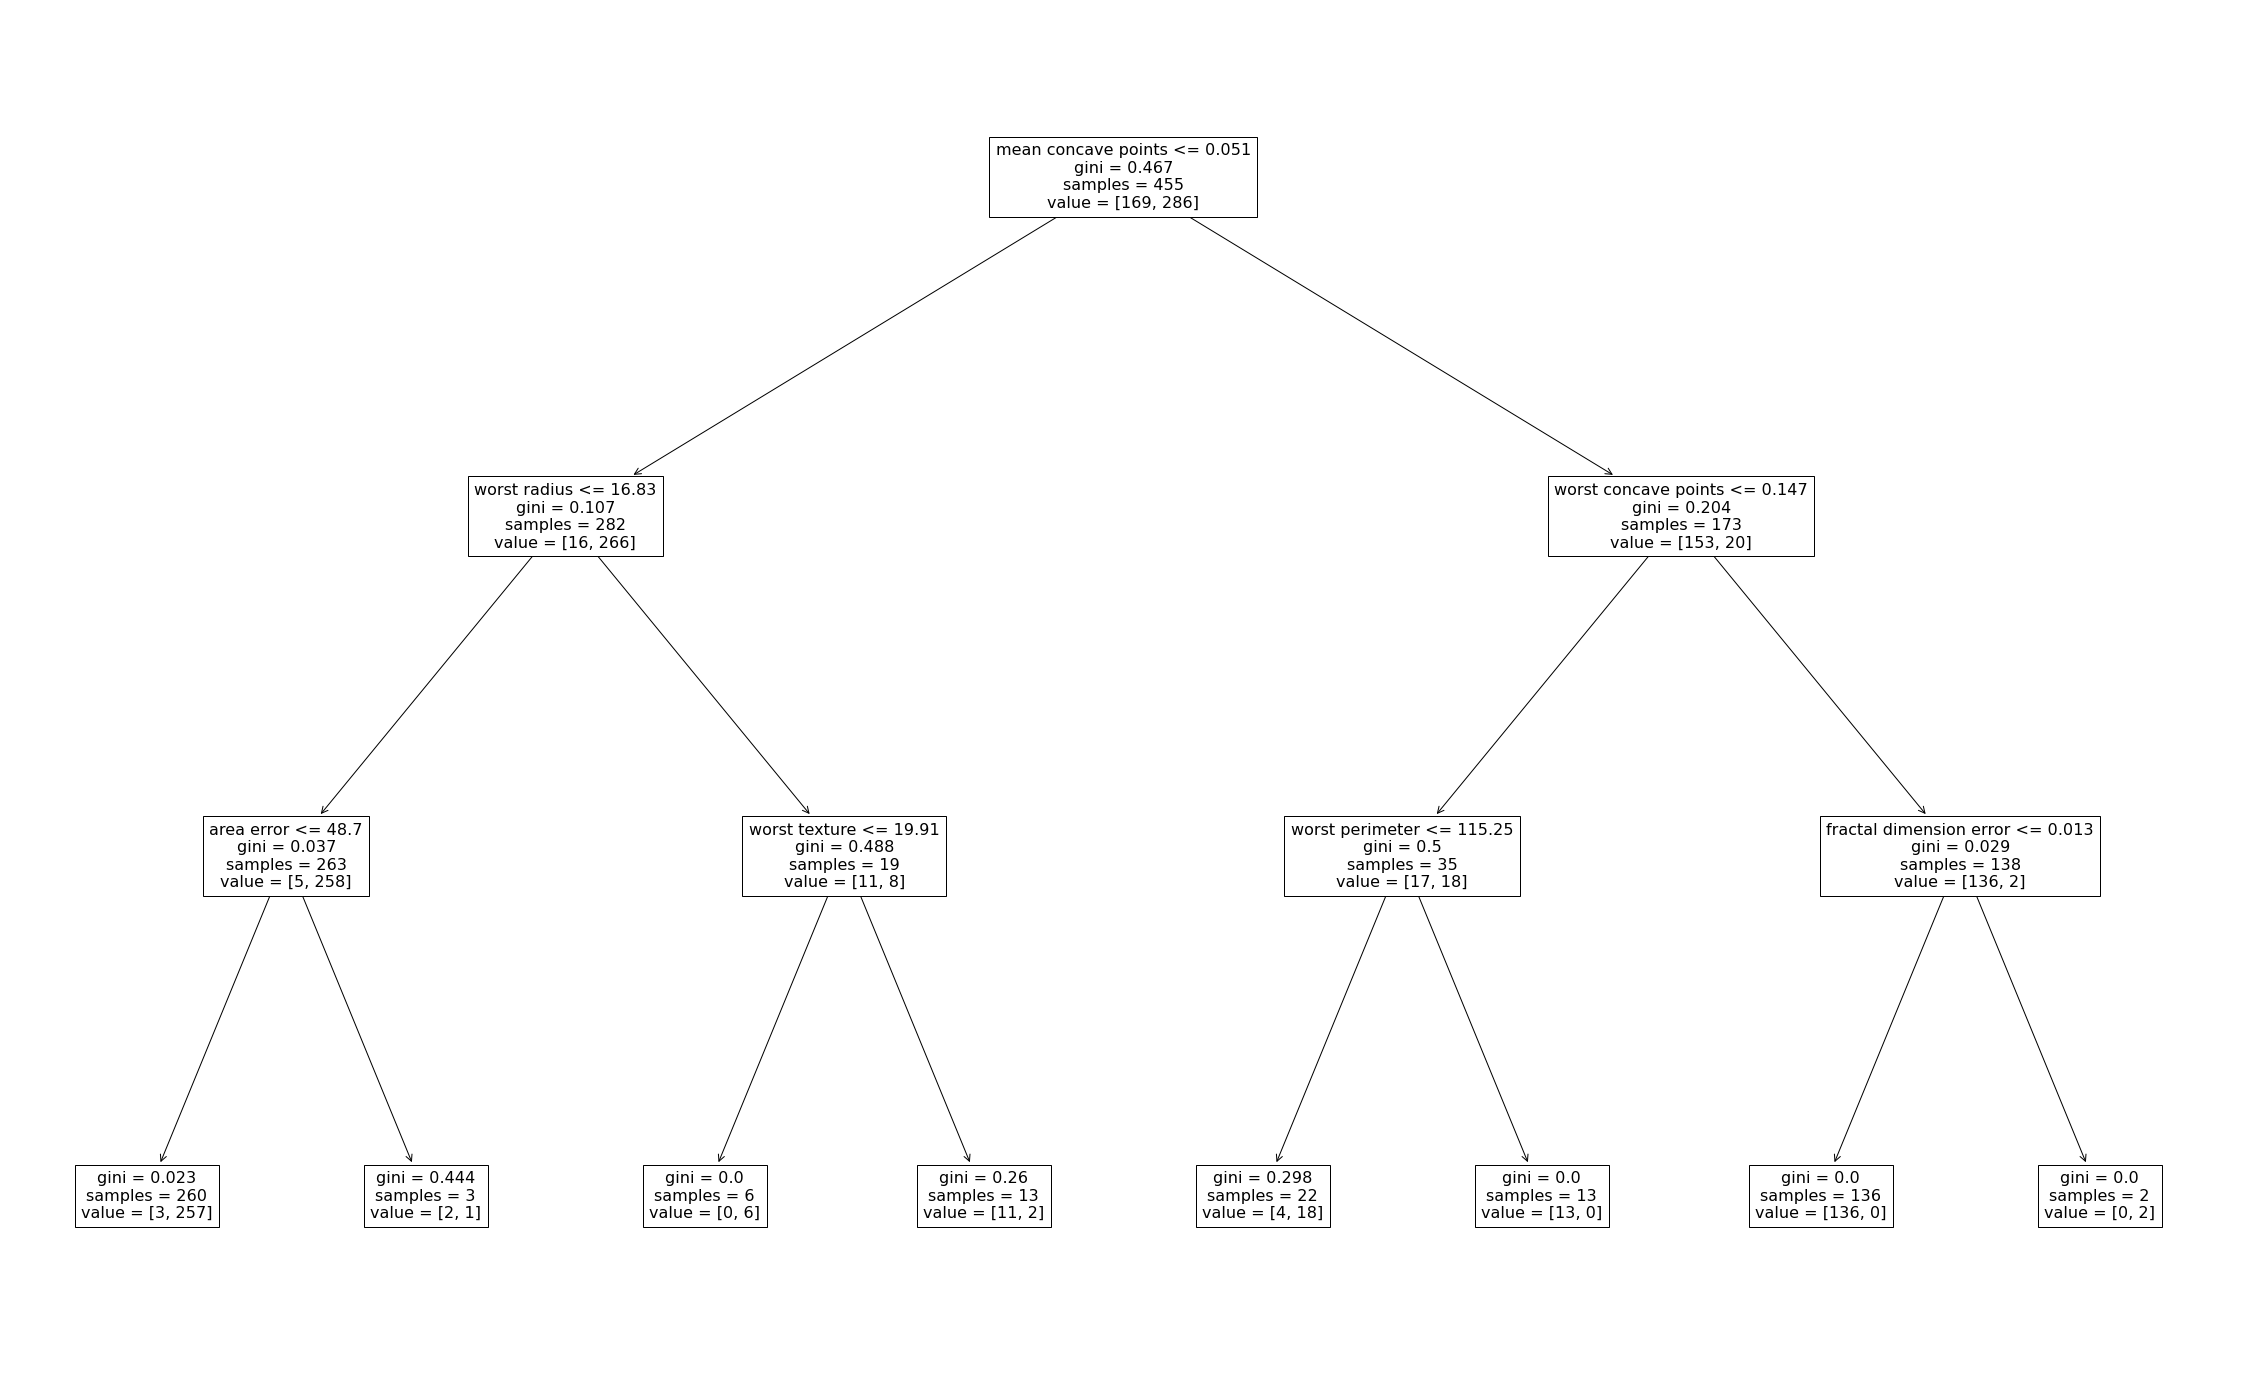

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=3)        ## hyper-paramer tuning -- changing given in "sklearn random forest parameters"
tree.fit(x_train,y_train)
plt.figure(figsize=(40,25))
plot_tree(tree,feature_names=cancer.feature_names)
plt.show()

In [96]:
from sklearn.metrics import accuracy_score
y_pred=tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.9473684210526315

#           grid search cv                  ------------------     20 aug
### grid search cross validation 



In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
params={'criterion':['gini','entropy','log_loss'],
         'max_depth':range(2,15),
        'splitter':['best','random']}

In [102]:
dt=DecisionTreeClassifier()

In [103]:
grid=GridSearchCV(estimator=dt,
                 param_grid=params,
                 scoring='accuracy')

In [104]:
grid.fit(x_train,y_train)

C:\Users\MANISH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
130 fits failed out of a total of 390.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MANISH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MANISH\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\MANISH\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 15),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [105]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [106]:
grid.best_score_

0.9406593406593406

In [107]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}

In [108]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, splitter='random')

#     Randon search cv

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
randomcv=RandomizedSearchCV(estimator=dt,
                           param_distributions=params,
                           n_iter=20)

In [116]:
randomcv.fit(x_train,y_train)
randomcv.best_score_

C:\Users\MANISH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MANISH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MANISH\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\MANISH\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fail

0.9406593406593406

In [117]:
randomcv.best_params_

{'splitter': 'best', 'max_depth': 4, 'criterion': 'entropy'}

In [119]:
randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#   Random forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [124]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [126]:
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [129]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [130]:
# feature importance
rf.feature_importances_

array([0.03428796, 0.01594011, 0.04623974, 0.04231593, 0.00681205,
       0.01110738, 0.05225689, 0.14604827, 0.00447832, 0.00352078,
       0.01238384, 0.00559828, 0.01788721, 0.03050576, 0.00480966,
       0.00562526, 0.00654637, 0.00403931, 0.00437725, 0.00524585,
       0.12111988, 0.02057974, 0.10066   , 0.09233185, 0.01275985,
       0.01632389, 0.04532428, 0.1127436 , 0.01230031, 0.00583038])

In [131]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [152]:
df=pd.DataFrame()
df['columns']=cancer.feature_names
df['importance']=rf.feature_importances_
df.sort_values('importance',ascending=False)

,columns,importance
7,mean concave points,0.146048
20,worst radius,0.121120
27,worst concave points,0.112744
22,worst perimeter,0.100660
23,worst area,0.092332
6,mean concavity,0.052257
2,mean perimeter,0.046240
26,worst concavity,0.045324
3,mean area,0.042316
0,mean radius,0.034288


# k nearest neighbors

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [145]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [147]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.956140350877193

In [148]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [156]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_transform=ss.fit_transform(x_train)

In [159]:
x_test_transform=ss.fit_transform(x_test)

In [160]:
knn.fit(x_train_transform,y_train)
y_pred=knn.predict(x_test_transform)
accuracy_score(y_test,y_pred)

0.956140350877193

In [163]:
# how to find best value of k
from sklearn.neighbors import KNeighborsClassifier

for neighbors in range(2,11):
    
    knn=KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(x_train_transform,y_train)
    y_pres=knn.predict(x_test_transform)
    print('Accuracy score is ',accuracy_score(y_test,y_pred),'for the value of k : ',neighbors)

Accuracy score is  0.956140350877193 for the value of k :  2
Accuracy score is  0.956140350877193 for the value of k :  3
Accuracy score is  0.956140350877193 for the value of k :  4
Accuracy score is  0.956140350877193 for the value of k :  5
Accuracy score is  0.956140350877193 for the value of k :  6
Accuracy score is  0.956140350877193 for the value of k :  7
Accuracy score is  0.956140350877193 for the value of k :  8
Accuracy score is  0.956140350877193 for the value of k :  9
Accuracy score is  0.956140350877193 for the value of k :  10


# support vector machine

In [164]:
from sklearn.svm import SVC
svc=SVC()

In [165]:
 # prefered that we scale the dataset

svc.fit(x_train_transform,y_train)
y_pred=svc.predict(x_test_transform)
accuracy_score(y_test,y_pred)

0.9824561403508771

# Naive Bayes Algorithm

In [166]:
x_train_transform

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [167]:
from sklearn.naive_bayes import GaussianNB

In [168]:
nb=GaussianNB()

In [169]:
nb.fit(x_train_transform,y_train)

GaussianNB()

In [170]:
y_pred=nb.predict(x_test_transform)
accuracy_score(y_test,y_pred)

0.956140350877193